# 1) Predicting Temperature

In [31]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

In [32]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, 
        postgres_db))
weather_df = pd.read_sql_query('select * from weatherinszeged',con = engine)

engine.dispose()

weather_df.head(10)

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 05:00:00+00:00,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 06:00:00+00:00,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 07:00:00+00:00,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


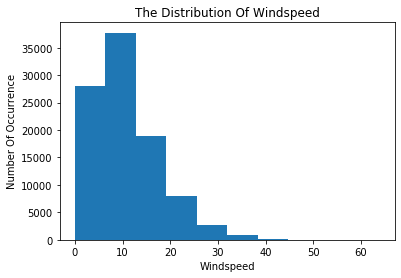

In [33]:
plt.hist(weather_df.windspeed)
plt.title("The Distribution Of Windspeed")
plt.xlabel("Windspeed")
plt.ylabel("Number Of Occurrence")
plt.show()

In [34]:
weather_df["humidity"] = pd.get_dummies(weather_df.humidity, drop_first = True)
weather_df["temperature"] = pd.get_dummies(weather_df.temperature, drop_first = True)

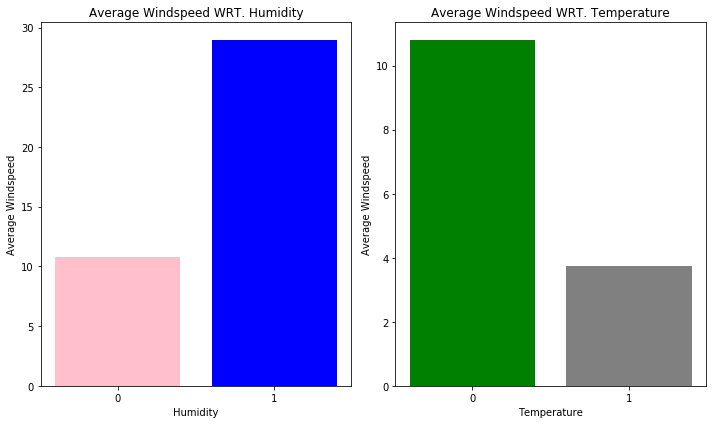

In [35]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.bar(weather_df.groupby("humidity")["windspeed"].mean().index, weather_df.groupby("humidity")["windspeed"].mean(),
       color=("pink","blue"))
plt.title("Average Windspeed WRT. Humidity")
plt.ylabel("Average Windspeed")
plt.xlabel("Humidity")
plt.xticks([0,1])

plt.subplot(1,2,2)
plt.bar(weather_df.groupby("temperature")["windspeed"].mean().index, weather_df.groupby("temperature")["windspeed"].mean(),
       color=("green","grey"))
plt.title("Average Windspeed WRT. Temperature")
plt.ylabel("Average Windspeed")
plt.xlabel("Temperature")
plt.xticks([0,1])

plt.tight_layout()
plt.show()


In [36]:
Y = weather_df['windspeed']

X = weather_df[['humidity','temperature']]

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [18.16932883 -7.0540045 ]

Intercept: 
 10.810671168182145



Coefficients: 
 [2. 3.]

Intercept: 
 0.999999999650754


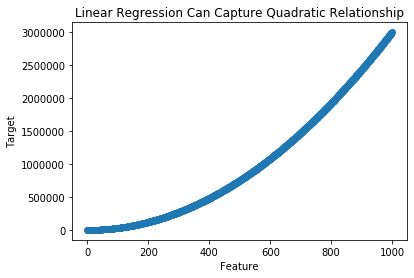

In [37]:
df = pd.DataFrame()

df["X"] = np.arange(0,1000,1)
df["X_sq"] = df["X"]**2

df["Y"] = 1 + 2*df["X"] + 3*df["X_sq"]

lrm_example = linear_model.LinearRegression()
lrm_example.fit(df[["X","X_sq"]],df["Y"])

predictions = lrm_example.predict(df[["X","X_sq"]])

print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)

plt.scatter(df["X"], predictions)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title('Linear Regression Can Capture Quadratic Relationship')
plt.show()

In [38]:
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: 1.2072589088609501e-15


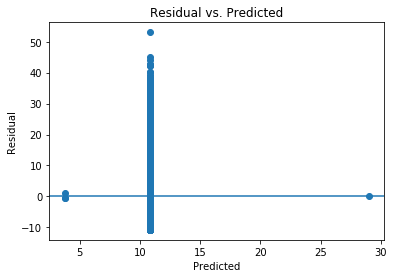

In [39]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [40]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 750879 and p value is 0
Levene test statistic value is 123901 and p value is 0


In [41]:
X = weather_df[['humidity','temperature']]

X.corr()

,humidity,temperature
humidity,1.000000,-0.000018
temperature,-0.000018,1.000000


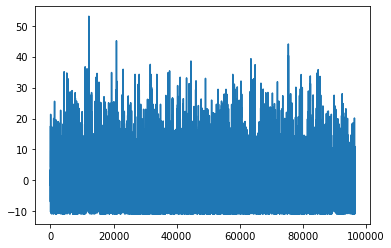

In [42]:
plt.plot(errors)
plt.show()

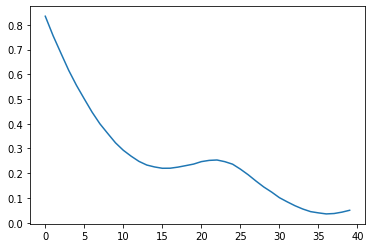

In [43]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

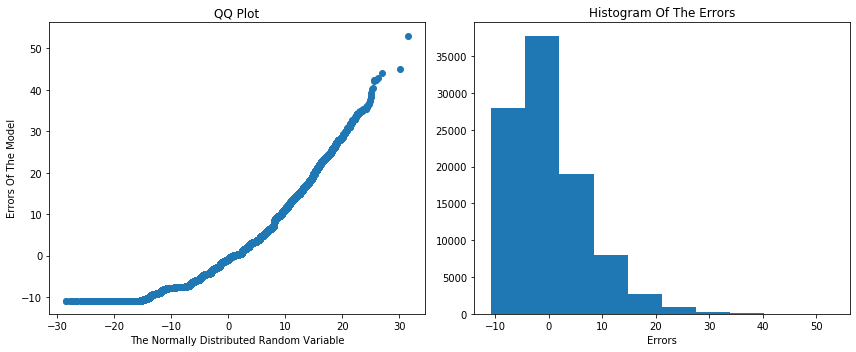

In [44]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors))
plt.xlabel("The Normally Distributed Random Variable")
plt.ylabel("Errors Of The Model")
plt.title("QQ Plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("Errors")
plt.title("Histogram Of The Errors")

plt.tight_layout()
plt.show()

In [45]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [46]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 32515.713507567598 and p value is 0.0
Normality test statistics is 17242.82393511986 and p value is 0.0


# Meeting and Not Meeting The Six Assumptions

In [47]:
# The data meets the first assumption because the graph depicts a smooth curve that curves upward.

In [48]:
# The data meets the second assumption because the mean of the errors in the houseprices model is 1.2072589088609501e-15 which 
# is approximately zero.

In [49]:
# The data does not meet the third assumption because the p-values of both tests are lower than 0.05.

In [50]:
# The data does meet the fourth assumption because the correlation is very low.

In [51]:
# The data does not meet the fifth assumption because the autocorrelation between the errors of the houseprices model is quite 
# high (ranging between 0 and 0.85).

In [52]:
# The data does meet the sixth assumption because there is a correlation between the feature and the error in the features, 
# in other words, the columns of the data.